In [2]:
import statistics

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

In [3]:
forbes_data = pd.read_csv(r"C:\Users\Krupa\Documents\Krups Coding\Untitled Folder\datasets\forbes.csv")

forbes_data.head()

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks
1,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks
2,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services
3,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks
4,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks


In [4]:
forbes_data.isnull().sum()

Rank              0
Company           0
Country           0
Sales             0
Profits           0
Assets            0
Market Value      0
Sector          197
Industry        491
dtype: int64

In [5]:
forbes_data.dropna(inplace=True)

forbes_data.isnull().sum()

Rank            0
Company         0
Country         0
Sales           0
Profits         0
Assets          0
Market Value    0
Sector          0
Industry        0
dtype: int64

In [7]:
forbes_data.shape

(1508, 9)

In [8]:
market_value_mean = forbes_data['Market Value'].mean()
market_value_mean

26.978494031830238

In [9]:
market_value_med = forbes_data['Market Value'].median()
market_value_med

13.1

In [10]:
diff_mean_med = market_value_mean - market_value_med
diff_mean_med

#this difference implies there are large number of outliers

13.878494031830238

In [11]:
#mode useful for categorical data such as the Sector column 
forbes_data['Sector'].value_counts()

Sector
Financials                    474
Consumer Discretionary        209
Industrials                   192
Materials                     145
Consumer Staples              106
Information Technology        103
Utilities                      86
Energy                         79
Health Care                    71
Telecommunication Services     43
Name: count, dtype: int64

In [12]:
sector_mode = forbes_data['Sector'].mode()

sector_mode

0    Financials
Name: Sector, dtype: object

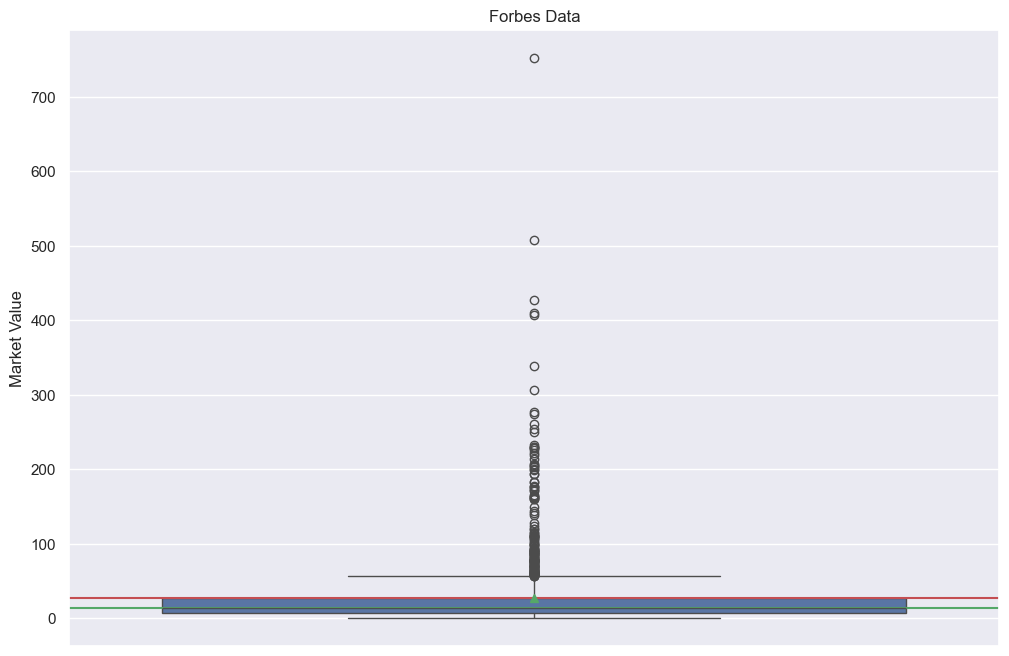

In [13]:
#boxplot visual summarises the stats of your data 
plt.figure(figsize = (12,8))

sns.boxplot(data=forbes_data, y ='Market Value', showmeans=True)

plt.axhline(y=market_value_mean, color='r', linestyle='-')
plt.axhline(y=market_value_med, color='g', linestyle='-')

plt.title('Forbes Data')

plt.show()

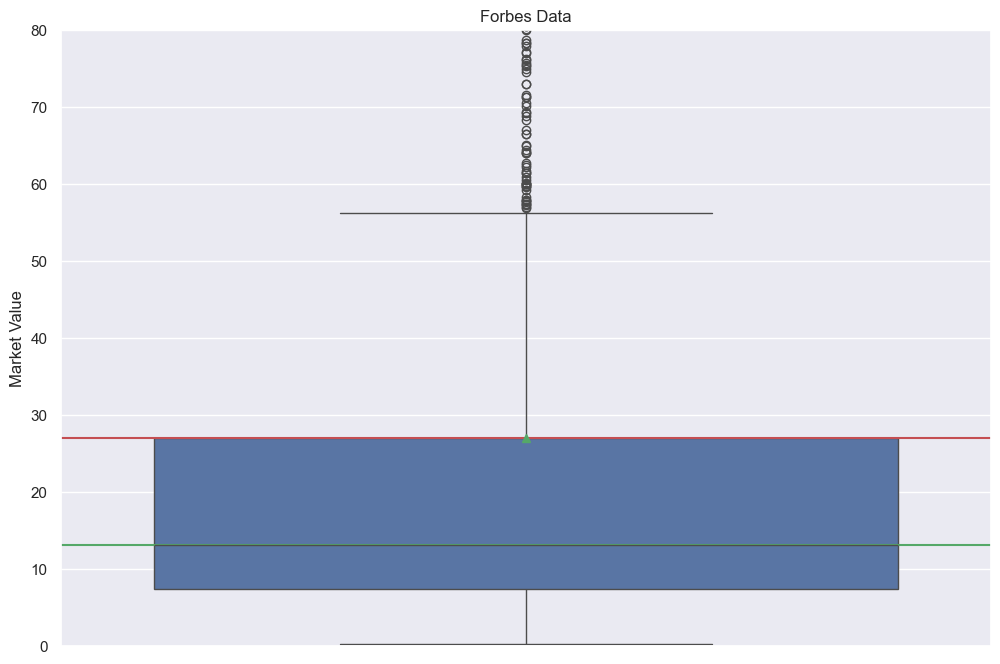

In [14]:
# figure above shows lots of outliers, let's limit the y-range to show a better illustration
#datapoints outside of the whiskers are considered to be outliers
#IQR is the blue shaded box (25th and 75th percentile)
plt.figure(figsize = (12,8))

sns.boxplot(data=forbes_data, y ='Market Value', showmeans=True)

plt.ylim(0, 80)

plt.axhline(y=market_value_mean, color='r', linestyle='-')
plt.axhline(y=market_value_med, color='g', linestyle='-')

plt.title('Forbes Data')

plt.show()

In [15]:
forbes_data.head()

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks
1,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks
2,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services
3,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks
4,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks


In [16]:
prof_max = forbes_data['Profits'].max()
prof_max

45.2

In [17]:
prof_min = forbes_data['Profits'].min()
prof_min

-13.0

In [18]:
prof_range = prof_max - prof_min
prof_range

58.2

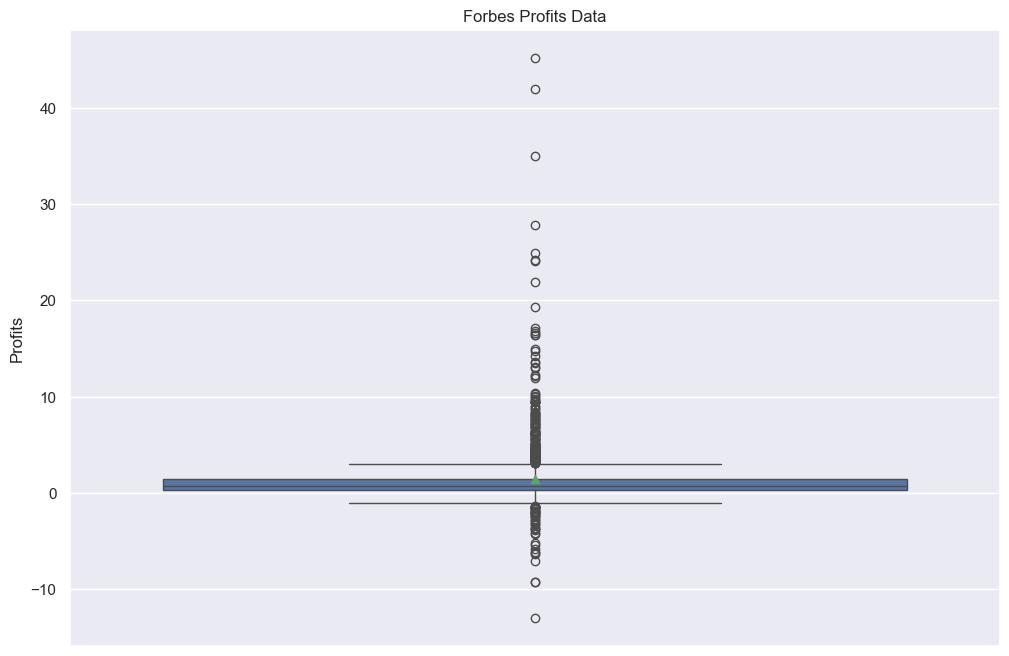

In [19]:
#range is very sensitive to outliers 
#lets use boxplt to visualise profits stats

plt.figure(figsize = (12,8))

sns.boxplot(data=forbes_data, y='Profits', showmeans=True)

plt.title('Forbes Profits Data')

plt.show()

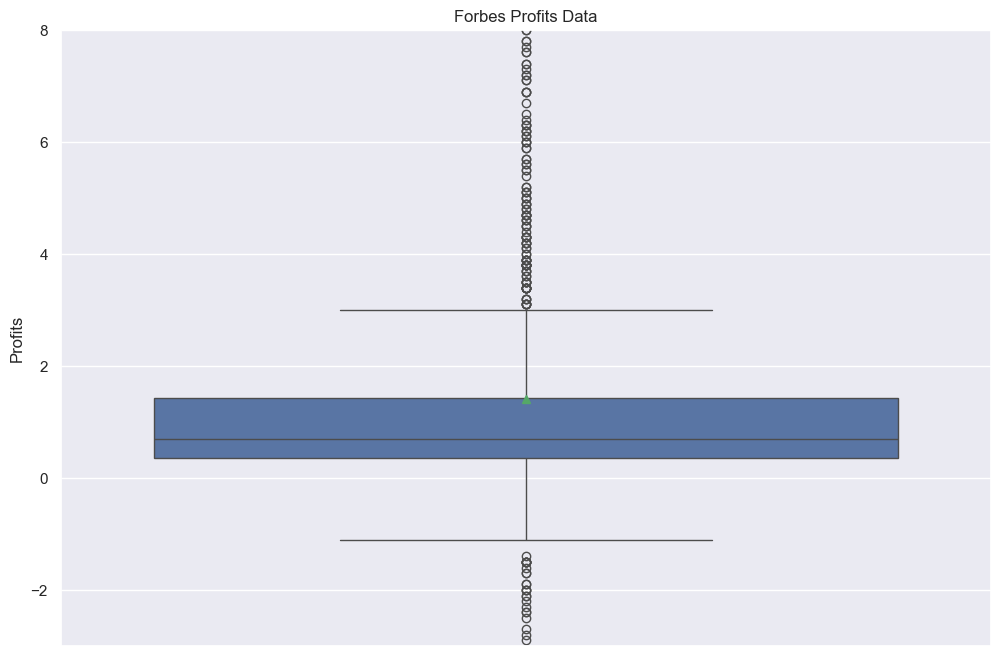

In [20]:
#due to lots of outliers beyond both upper and lower whiskers, let's limit the y-range 

plt.figure(figsize = (12,8))

sns.boxplot(data=forbes_data, y='Profits', showmeans=True)

plt.ylim(-3,8)

plt.title('Forbes Profits Data')

plt.show()

In [21]:
#the IQR is not very sensitive to outliers 

Q1 = np.quantile(forbes_data['Profits'], 0.25)
Q1

0.34975

In [22]:
Q3 = np.quantile(forbes_data['Profits'], 0.75)
Q3

1.4249999999999998

In [23]:
IQR = Q3 - Q1 

IQR

1.0752499999999998

In [24]:
prof_std = forbes_data['Profits'].std()
prof_std

3.244201278603241

In [26]:
#variance is square of standard deviation 
prof_var = prof_std **2
prof_var

10.524841936090903

In [28]:
#measures of central tendency 
forbes_data.describe()

,Rank,Sales,Profits,Assets,Market Value
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,909.135279,19.623046,1.407430,97.647016,26.978494
std,554.044456,30.875809,3.244201,287.036157,47.099541
min,1.000000,0.001000,-13.000000,1.300000,0.240000
25%,433.750000,4.900000,0.349750,12.800000,7.300000
50%,883.500000,10.300000,0.692500,25.900000,13.100000
75%,1354.250000,19.900000,1.425000,60.325000,26.900000
max,1999.000000,485.300000,45.200000,3473.200000,752.000000
